In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('data.csv')

# print initial data info and head
print("\n--- Initial Data Info ---")
df.info()
print("\n\n--- Initial Data Head ---")
print(df.head())


--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  831 non-null    object 
 1   ITAPROINDMISMEI   831 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.1+ KB


--- Initial Data Head ---
  observation_date  ITAPROINDMISMEI
0       1955-01-01         21.82560
1       1955-02-01         22.03547
2       1955-03-01         22.35980
3       1955-04-01         22.20717
4       1955-05-01         22.43611


In [31]:
# rename columns for acting more easily on them
df.columns = ['date', 'y']

# trasnforming the data type of the date
df['date'] = pd.to_datetime(df['date'])

# setting the date as the index of the series
df.set_index('date', inplace=True)

# Ensure the index is a DatetimeIndex with a monthly frequency
df = df.asfreq('MS')

In [32]:
# checking for any missing values
missing_values = df['y'].isnull().sum()
if missing_values > 0:
    print(f"\nFound {missing_values} missing values after setting frequency. We will fill them later if necessary.")
else:
    print("\nNo missing values found after setting monthly frequency.")


No missing values found after setting monthly frequency.


In [33]:
total_obs = len(df)
min_obs = 100
min_test_ratio = 0.20

print(f"\n--- Constraint Verification ---")
print(f"Total observations: {total_obs}")
if total_obs >= min_obs:
    print(f"✅ Data Size Constraint Met (Total Observations $\\geq$ {min_obs})")
else:
    print(f"❌ Data Size Constraint Failed (Total Observations $<$ {min_obs})")


--- Constraint Verification ---
Total observations: 831
✅ Data Size Constraint Met (Total Observations $\geq$ 100)


In [34]:
print("\n--- Prepared Data Head ---\n")
print(df.head())


--- Prepared Data Head ---

                   y
date                
1955-01-01  21.82560
1955-02-01  22.03547
1955-03-01  22.35980
1955-04-01  22.20717
1955-05-01  22.43611


In [35]:
# let's begin by fixing the test size for the first univariate models (the ones without any other external regressors)

test_size = int(np.ceil(total_obs * min_test_ratio))
train_size = total_obs - test_size

train_end_index = df.index[train_size - 1]
test_start_index = df.index[train_size]

print(f"\nMinimum evaluation set size (20%): {test_size} observations")
print(f"Train set size: {train_size} observations")
print(f"Train set period: {df.index.min().strftime('%Y-%m-%d')} to {train_end_index.strftime('%Y-%m-%d')}")
print(f"Test set period: {test_start_index.strftime('%Y-%m-%d')} to {df.index.max().strftime('%Y-%m-%d')}")


Minimum evaluation set size (20%): 167 observations
Train set size: 664 observations
Train set period: 1955-01-01 to 2010-04-01
Test set period: 2010-05-01 to 2024-03-01


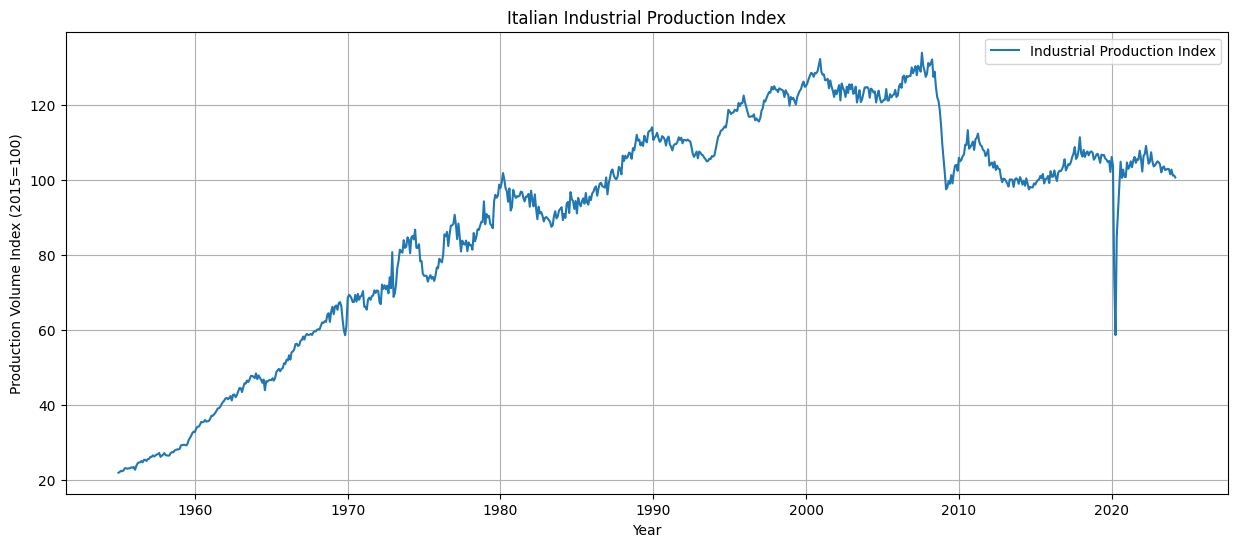

In [36]:
# Visualize initial time series
plt.figure(figsize=(15,6))
plt.plot(df.index, df['y'], label='Industrial Production Index')
plt.title('Italian Industrial Production Index')
plt.xlabel('Year')
plt.ylabel('Production Volume Index (2015=100)')
plt.legend()
plt.grid(True)
plt.show()

The Italian Industrial Production Index (ITAPROINDMISMEI) data from 1955 onwards has been plotted. The time series shows a clear long-term trend and cyclical fluctuations, along with visible seasonal patterns typical in monthly economic data. This initial visualization is essential for understanding how the series behaves over time and deciding on further steps for transformation and modeling.